In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

Link for dataset : https://advaitaashrama.org/cw/content.php

In [2]:
# Reading the Data
with open('swamivivekananda.txt') as f:
    contents = f.read()
    print(contents)

All over the world there has been the belief in the supernatural throughout the ages. All of us have heard of extraordinary happenings, and many of us have had some personal experience of them. I would rather introduce the subject by telling you certain facts which have come within my own experience. I once heard of a man who, if any one went to him with questions in his mind, would answer them immediately; and I was also informed that he foretold events. I was curious and went to see him with a few friends. We each had something in our minds to ask, and, to avoid mistakes, we wrote down our questions and put them in our pockets. As soon as the man saw one of us, he repeated our questions and gave the answers to them. Then he wrote something on paper, which he folded up, asked me to sign on the back, and said, "Don't look at it; put it in your pocket and keep it there till I ask for it again." And so on to each one of us. He next told us about some events that would happen to us in the

## Tokenising The Data

In [3]:
def tokeniser(corpus):
    pattern = "[,.?;]*\w*[\\'-]*\w*"
    list1 = re.findall(pattern,corpus)
#     list2 = list(filter("".__ne__,list1))
    return list2

In [4]:
tokenised_corpus = tokeniser(contents)
tokenised_corpus = [i.lower() for i in tokenised_corpus]
vocabulary = sorted(list(set(tokenised_corpus)))
print(f"The length of Vocabulary is {len(vocabulary)}")

The length of Vocabulary is 1062


In [5]:
c = ""
for i in tokenised_corpus:
    c = c + " "+ i + " "
preprocessed_corpus = c

In [6]:
preprocessed_corpus

" all  over  the  world  there  has  been  the  belief  in  the  supernatural  throughout  the  ages  .  all  of  us  have  heard  of  extraordinary  happenings  ,  and  many  of  us  have  had  some  personal  experience  of  them  .  i  would  rather  introduce  the  subject  by  telling  you  certain  facts  which  have  come  within  my  own  experience  .  i  once  heard  of  a  man  who  ,  if  any  one  went  to  him  with  questions  in  his  mind  ,  would  answer  them  immediately  ;  and  i  was  also  informed  that  he  foretold  events  .  i  was  curious  and  went  to  see  him  with  a  few  friends  .  we  each  had  something  in  our  minds  to  ask  ,  and  ,  to  avoid  mistakes  ,  we  wrote  down  our  questions  and  put  them  in  our  pockets  .  as  soon  as  the  man  saw  one  of  us  ,  he  repeated  our  questions  and  gave  the  answers  to  them  .  then  he  wrote  something  on  paper  ,  which  he  folded  up  ,  asked  me  to  sign  on  the  back

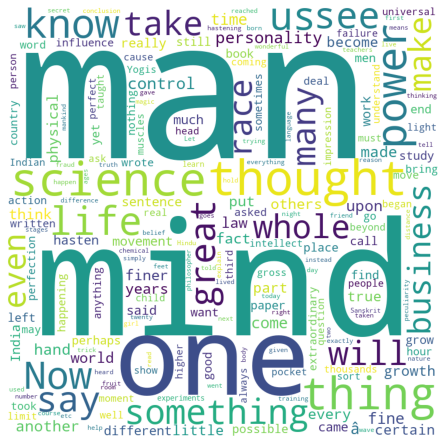

In [7]:
# Data Visialisation
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(contents)
plt.figure(figsize = (16, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [162]:
def countpat(pattern,corpus):
    l = re.findall(pattern,corpus)
    return len(l)

In [163]:
for i in range(len(vocabulary)):
    if vocabulary[i] == ".":
        vocabulary[i] = "\."
    elif vocabulary[i] == "?":
        vocabulary[i] = "\?"
    elif vocabulary[i] == ".,":
        vocabulary[i] = "\.,"

## Unigram

In [164]:
def prediction():
    prob = np.zeros(len(vocabulary))
    for i in range(len(vocabulary)):
        pat = " "+vocabulary[i]+ " "
        prob[i] = countpat(pat,preprocessed_corpus)
    word = vocabulary[np.argmax(prob)] + " "
    return word

In [165]:
def unigram_model(prompt = "",gen_len = 10):
    gen_sen = prompt.strip() + " "
    i = 1
    while i <= gen_len:
        gen_sen += prediction()+" "
        i += 1
    return gen_sen

In [166]:
unigram_model(prompt= "The sentence ")

'The sentence ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  '

### Bigram

In [167]:
def prediction_bi(prev = ""):
    prob = np.zeros(len(vocabulary))
    for i in range(len(vocabulary)):
        prev1 = " " + prev.strip() + " "
        pat = prev1 + " " + vocabulary[i]+ " "
        prob[i] = countpat(pat,preprocessed_corpus)
    word = vocabulary[np.argmax(prob)]
    return word.strip()

In [170]:
def Bigram_model(prompt = "",gen_len = 20):
    prompt = prompt.lower().strip()
    gen_sen = prompt + " "
    sen = prompt.split(" ")
    prev = sen[-1]
    i = 1
    flag = 1
    while i <= gen_len and flag == 1:
        pred = prediction_bi(prev) + " "
        gen_sen += pred
        prev = pred
        i += 1
        if pred == "\.":
            flag = 0
    return gen_sen

In [171]:
Bigram_model("I am")

'i am unsuccessful , and he said , and he said , and he said , and he said , and he '

### N-Gram Model For N $\geq$ 1

In [251]:
def prediction_n(n,prev):
    global flag
    prob = np.zeros(len(vocabulary))
    for i in range(len(vocabulary)):
        prev1 = " " + prev.strip() + " "
        if countpat(prev1,preprocessed_corpus) == 0 :
            flag = 0
            print("The Given prompt is out of Vocabulary")
            return ""
        pat = prev1 + " " + vocabulary[i]+ " "
        prob[i] = countpat(pat,preprocessed_corpus)
    word = vocabulary[np.argmax(prob)]
    return word.strip()

In [254]:
def N_gram_model(n,prompt = "",gen_len = 20,stop_seq = "\."):
    global flag
    if n < 1 :
        return "This Model is Undefined"
    elif n == 1 :
        return "Please use the Unigram Model"
    else:
        prompt = prompt.lower().strip()
        gen_sen = prompt + " "
        sen = prompt.split(" ")
        sen = list(filter("".__ne__,sen))
        if n >= len(sen):
            prev = sen[-1:-n:-1]
            prev.reverse()
        else:
            prev = sen
    i = 1
    flag = 1
    while i <= gen_len and flag == 1 :
        previous = "  ".join(prev)
        pred = prediction_n(n,previous) 
        if pred == stop_seq :
            break
        elif pred == "\?":
            gen_sen += "? "
            if len(prev) >= n :
                prev.pop(0)
            prev.append(pred) 
        elif pred == "\.":
            gen_sen += ". "
            if len(prev) >= n :
                prev.pop(0)
            prev.append(pred)
        else:
            gen_sen += pred + " "
            if len(prev) >= n :
                prev.pop(0)
            prev.append(pred)
        i += 1
    return gen_sen

In [255]:
N_gram_model(6,prompt=" the hirb",stop_seq="\?",gen_len=60)

The Given prompt is out of Vocabulary


'the hirb  '